In [2]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../lightning_logs"))

In [17]:
from utils_result import get_loss,get_standardised_loss
from plot import plot_bar_vertical
import pandas as pd
import numpy as np
from sklearn.metrics import median_absolute_error

from utils_result import *
from plot import plot_bar_horizontal,plot_bar_vertical,vertical_boxplot,horizontal_boxplot,create_MAD_comparison_boxplot,create_MAD_comparison_violinplot

In [4]:
model_predictions = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/t_loss=0.2482.csv"

In [5]:
df = pd.read_csv(model_predictions, index_col=0)

In [15]:
df

,modified_sequence,label,filename,dataset,task,predictions
11819239,IEDHLDEAIHVLR,72.695371,Grobi_20121105_CHS_IEF_20121025_pep_gradient_7...,MSV000080274,iRT,71.100396
8565202,LPIPRPGEVLGLVGTNGIGK,111.880875,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,MSV000080274,iRT,123.821908
11363042,VLAGQTLDINMAGEPKPDRPK,58.032409,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,MSV000080274,iRT,57.861598
11230880,HLEINPDHPIVETLR,64.505553,Grobi_20121105_CHS_IEF100_20121025_pep_gradien...,MSV000080274,iRT,62.304341
9928139,DLYANTVLSGGTTMYPGIADR,85.656998,Grobi_20121105_CHS_IEF100_20121025_pep_gradien...,MSV000080274,iRT,116.575044
...,...,...,...,...,...,...
9819793,SEAHTADGISIR,16.998720,Bibo_20130621_CHS_IEF_3-10linear_24slices_09.m...,MSV000080274,iRT,14.149623
10007939,EMDPVTQLYTMTSTLEYK,123.054974,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,MSV000080274,iRT,154.424906
10119775,SGLTTLVATSVNSVTGIR,139.892831,Kermit_20130417_CHS_20130123_IEF100_201303xx_3...,MSV000080274,iRT,131.299563
9960217,HFALDAAATVAAQR,61.419613,Grobi_20121105_CHS_IEF100_20121025_pep_gradien...,MSV000080274,iRT,65.985471


# Testing code

In [7]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    
    # Convert to numpy array if it's not already
    if isinstance(series, pd.Series):
        data = series.values
    else:
        data = np.asarray(series)
    
    # Calculate the median
    median_value = np.median(data)
    
    # Calculate the absolute deviations from the median
    abs_deviations = np.abs(data - median_value)
    
    # Calculate the median of the absolute deviations
    mad = np.median(abs_deviations)
    
    return mad

In [8]:
testing = df.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x))

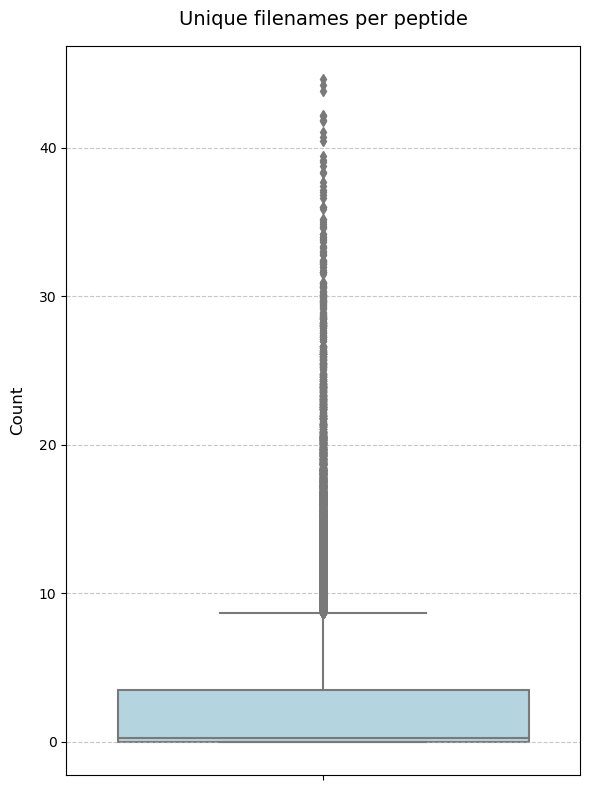

In [9]:
vertical_boxplot(testing,"Count","Unique filenames per peptide")

In [12]:
values_under_p90 = testing[testing < testing.quantile(0.90)]

In [13]:
new_df = df[df['modified_sequence'].isin(values_under_p90.index)]

In [14]:
new_df

,modified_sequence,label,filename,dataset,task,predictions
11819239,IEDHLDEAIHVLR,72.695371,Grobi_20121105_CHS_IEF_20121025_pep_gradient_7...,MSV000080274,iRT,71.100396
8565202,LPIPRPGEVLGLVGTNGIGK,111.880875,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,MSV000080274,iRT,123.821908
11363042,VLAGQTLDINMAGEPKPDRPK,58.032409,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,MSV000080274,iRT,57.861598
11230880,HLEINPDHPIVETLR,64.505553,Grobi_20121105_CHS_IEF100_20121025_pep_gradien...,MSV000080274,iRT,62.304341
11239389,EYFGGFGEVESIELPMDNK,123.573348,Grobi_20121105_CHS_IEF_20121025_pep_gradient_7...,MSV000080274,iRT,136.653934
...,...,...,...,...,...,...
9819793,SEAHTADGISIR,16.998720,Bibo_20130621_CHS_IEF_3-10linear_24slices_09.m...,MSV000080274,iRT,14.149623
10007939,EMDPVTQLYTMTSTLEYK,123.054974,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,MSV000080274,iRT,154.424906
10119775,SGLTTLVATSVNSVTGIR,139.892831,Kermit_20130417_CHS_20130123_IEF100_201303xx_3...,MSV000080274,iRT,131.299563
9960217,HFALDAAATVAAQR,61.419613,Grobi_20121105_CHS_IEF100_20121025_pep_gradien...,MSV000080274,iRT,65.985471


# Good code

In [327]:
heterogenous_peptides = df.groupby('modified_sequence')['filename'].nunique()
heterogenous_peptides = heterogenous_peptides[heterogenous_peptides > 12].index
heterogenous_peptides = df[df['modified_sequence'].isin(heterogenous_peptides)]

In [328]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    
    # Convert to numpy array if it's not already
    if isinstance(series, pd.Series):
        data = series.values
    else:
        data = np.asarray(series)
    
    # Calculate the median
    median_value = np.median(data)
    
    # Calculate the absolute deviations from the median
    abs_deviations = np.abs(data - median_value)
    
    # Calculate the median of the absolute deviations
    mad = np.median(abs_deviations)
    
    return mad

In [329]:
#heterogenous_peptides.groupby('filename','predictions')['predictions'].apply(lambda x: median_absolute_deviation(x))
heterogenous_peptides = heterogenous_peptides.groupby(['modified_sequence','filename'])['predictions'].median().reset_index()

In [330]:
heterogenous_peptides

,modified_sequence,filename,predictions
0,AAAAAAAAAAGAAGGR,Bibo_20121204_CHS_IEF100_20121129_3-10linear_S...,20.611795
1,AAAAAAAAAAGAAGGR,Bibo_20130621_CHS_IEF_3-10linear_24slices_14.m...,11.195487
2,AAAAAAAAAAGAAGGR,Bibo_20130621_CHS_IEF_3-10linear_24slices_15.m...,17.519184
3,AAAAAAAAAAGAAGGR,Bibo_20130621_CHS_IEF_3-10linear_24slices_16.m...,21.119537
4,AAAAAAAAAAGAAGGR,Bibo_20130621_CHS_IEF_3-10linear_24slices_21.m...,17.980768
...,...,...,...
30323,YYVTIIDAPGHR,Kermit_20130412_CHS_20130123_IEF100_201303xx_3...,62.708227
30324,YYVTIIDAPGHR,Kermit_20130417_CHS_20130123_IEF100_201303xx_2...,60.434927
30325,YYVTIIDAPGHR,Kermit_20130417_CHS_20130123_IEF100_201303xx_3...,60.665719
30326,YYVTIIDAPGHR,Kermit_20130417_CHS_20130123_IEF100_201303xx_3...,61.646585


In [331]:
heterogenous_peptides=heterogenous_peptides.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x))

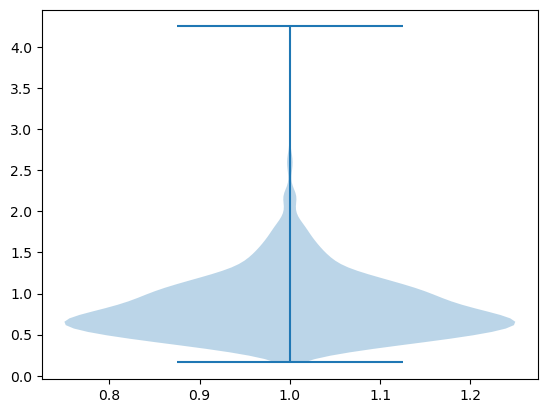

In [332]:
plt.violinplot(heterogenous_peptides)
plt.show()

In [333]:
homogene_peptides = df.groupby('modified_sequence')['filename'].nunique()
homogene_peptides = homogene_peptides[homogene_peptides == 1].index
homogene_peptides = df[df['modified_sequence'].isin(homogene_peptides)]
homogene_peptides = homogene_peptides.drop_duplicates(subset=['modified_sequence'])

In [334]:
mad = np.median(np.abs(homogene_peptides['label'] - homogene_peptides['predictions']))

In [335]:
mad

6.759795901999002

In [336]:
heterogenous_peptides = df.groupby('modified_sequence')['filename'].nunique()
heterogenous_peptides = heterogenous_peptides[heterogenous_peptides > 10].index
heterogenous_peptides = df[df['modified_sequence'].isin(heterogenous_peptides)]
heterogenous_peptides = heterogenous_peptides.drop_duplicates(subset=['modified_sequence'])

In [337]:
mad = np.median(np.abs(heterogenous_peptides['label'] - heterogenous_peptides['predictions']))

In [338]:
mad

8.517666006378406

In [339]:
testing = df.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x))

{'bodies': [<matplotlib.collections.PolyCollection at 0x2e42f613bb0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2e42f613310>,
 'cmins': <matplotlib.collections.LineCollection at 0x2e42f613820>,
 'cbars': <matplotlib.collections.LineCollection at 0x2e42f613e50>}

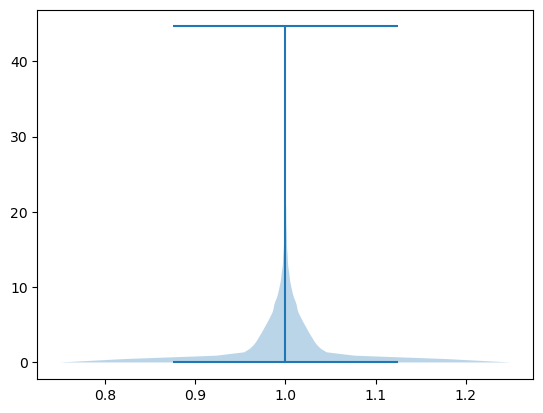

In [340]:
plt.violinplot(testing)

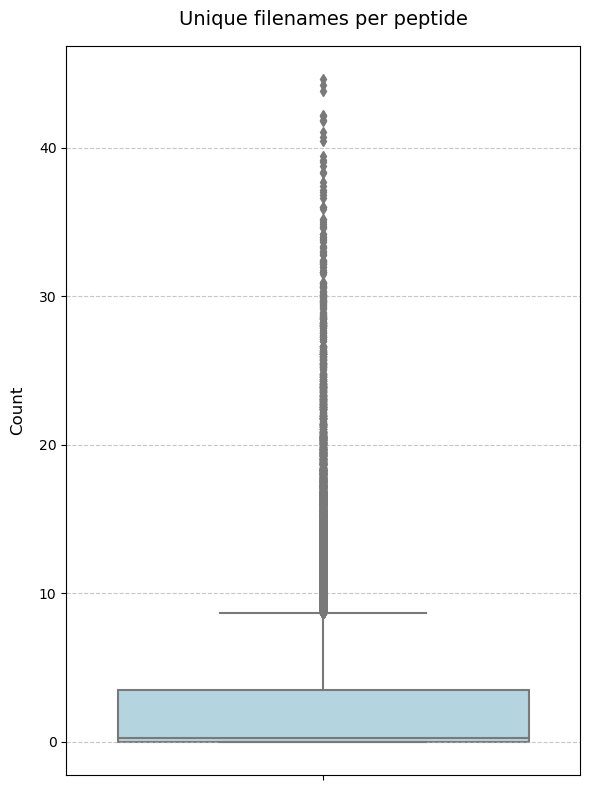

In [341]:
vertical_boxplot(testing,"Count","Unique filenames per peptide")